# **Predicting Lettuce Growth Days**

## Life Cycle of Machine Learning Project 

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory Data Analysis
* Data Pre-processing
* Model Training

# 1) Problem Statement

* This project will try to understand the lettuce growth days affected by other variables such as `Temperature`, `Humidity`, `TDS (Total Dissolved Solid) ppm`, and `pH Level`.

# 2) Data Collection

* This data are collected via arduino sensors.

## 2.1) Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Import the CSV Data and Pandas DataFrame

In [2]:
lettuce_df = pd.read_csv('data\lettuce_dataset.csv')
lettuce_df.head()

,Plant_ID,Date,Temperature,Humidity,TDS Value (ppm),pH Level,Growth Days
0,1,8/3/2023,33.4,53,582,6.4,1
1,1,8/4/2023,33.5,53,451,6.1,2
2,1,8/5/2023,33.4,59,678,6.4,3
3,1,8/6/2023,33.4,68,420,6.4,4
4,1,8/7/2023,33.4,74,637,6.5,5


## 2.2) Dataset information

1. `Plant Identifier (Plant_ID)`: A unique identifier assigned to each plant.
2. `Date (Date)`: The date of Observation.
3. `Temperature (°C)`: The recorded temperature expressed in degrees Celsius.
4. `Humidity (%)`: The percentage representing the humidity level.
5. `Total Dissolved Solids (TDS) Value (ppm)`: The measurement of Total Dissolved Solids given in parts per million.
6. `pH Level`: The measurement of the environmental pH level.
7. `Growth Days`:The duration in days from the initial growth stage of the plant to its full maturity.

# 3) Data Checks to perform

## 3.1) Check missing and duplicate values

In [3]:
print('Missing values: ', lettuce_df.isnull().any().sum())
print('Duplicate values: ', lettuce_df.duplicated().sum())

Missing values:  0
Duplicate values:  0


There are no missing and duplicate values in the dataset.

## 3.2) Check Data types

In [4]:
lettuce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Plant_ID         3169 non-null   int64  
 1   Date             3169 non-null   object 
 2   Temperature      3169 non-null   float64
 3   Humidity         3169 non-null   int64  
 4   TDS Value (ppm)  3169 non-null   int64  
 5   pH Level         3169 non-null   float64
 6   Growth Days      3169 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 173.4+ KB


## 3.3) Checking the number of unique values of each column

In [5]:
lettuce_df.nunique()

Plant_ID            70
Date                48
Temperature         98
Humidity            31
TDS Value (ppm)    401
pH Level             9
Growth Days         48
dtype: int64

## 3.4) Check statistics of dataset

In [6]:
lettuce_df.describe()

,Plant_ID,Temperature,Humidity,TDS Value (ppm),pH Level,Growth Days
count,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000
mean,35.441780,28.142222,64.873462,598.045440,6.399211,23.140107
std,20.243433,4.670521,8.988985,115.713047,0.234418,13.075415
min,1.000000,18.000000,50.000000,400.000000,6.000000,1.000000
25%,18.000000,23.600000,57.000000,498.000000,6.200000,12.000000
50%,35.000000,30.200000,65.000000,593.000000,6.400000,23.000000
75%,53.000000,31.500000,73.000000,699.000000,6.600000,34.000000
max,70.000000,33.500000,80.000000,800.000000,6.800000,48.000000


# 4) Exploratory Data Analysis (Visualization)

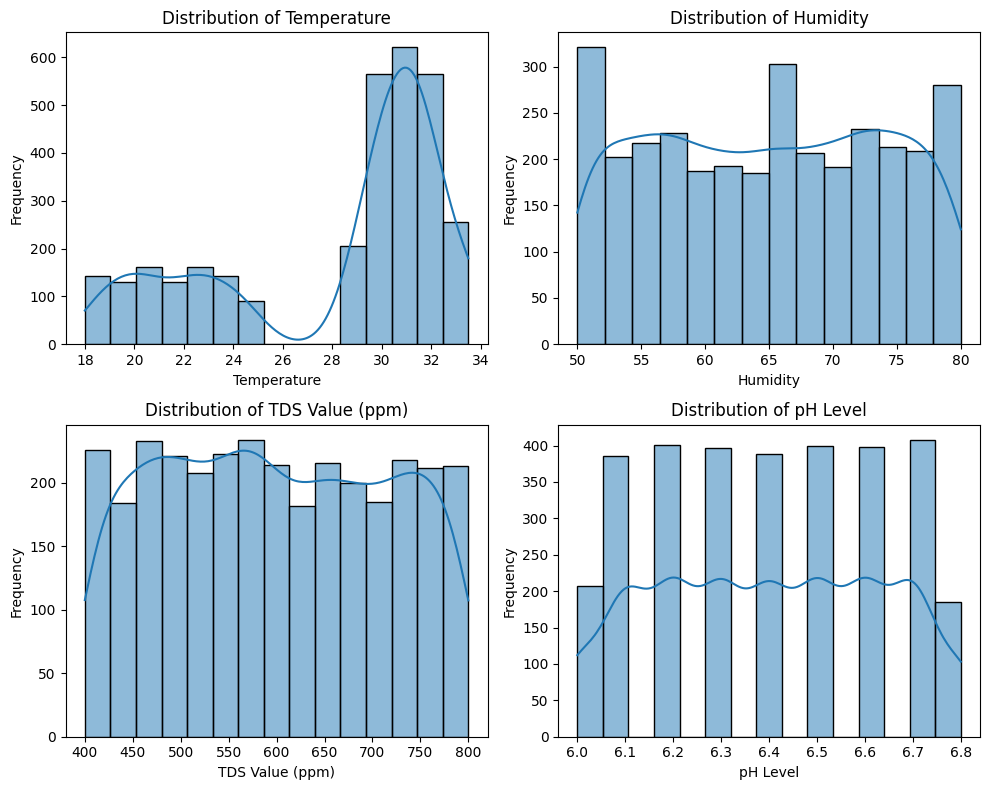

In [8]:
# Check for the distribution of the features
feature_to_plot = ['Temperature', 'Humidity',
       'TDS Value (ppm)', 'pH Level']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axs array to make it easier to access individual subplots
axs = axs.ravel()

# Plot each feature's distribution in its respective subplot
for i, feature in enumerate(feature_to_plot):
    sns.histplot(lettuce_df[feature], ax=axs[i], kde=True)
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequency')

# Remove any empty subplots if the number of features is less than 4
if len(feature_to_plot) < 4:
    for i in range(len(feature_to_plot), 4):
        fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


### Observations:

1.  `Temperature (°C)`: The temperature seems to be centered around the 33-34°C range, with a few variations.
2.  `Humidity (%)`: The humidity has a wider range, but there's a noticeable peak around the 75% mark.
3.   `TDS Value (ppm)`: The TDS values show multiple peaks, indicating variability in the data.


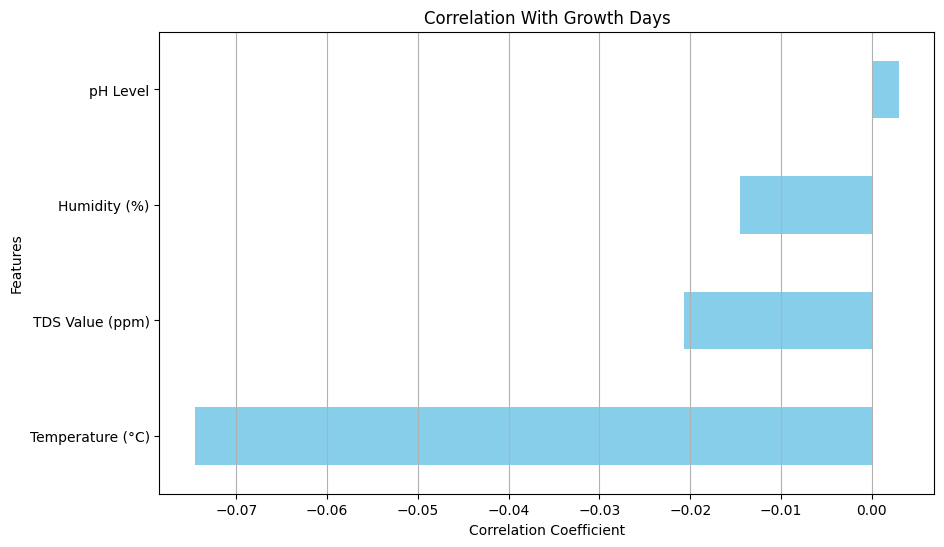

Correlation Values: 
 Temperature (°C)   -0.074601
Humidity (%)       -0.014481
TDS Value (ppm)    -0.020633
pH Level            0.003023
Name: Growth Days, dtype: float64


In [ ]:
# Check for the correlation of features with the target variable 'Growth Days'
correlations = lettuce_df[feature_to_plot + ['Growth Days']].corr()['Growth Days'].drop('Growth Days')

plt.figure(figsize=(10, 6))
correlations.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation With Growth Days')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()

print('Correlation Values: \n', correlations)

### Observations:
* We can see that the `Temperature, Humidity, and TDS Value` have a slightly negative correlation but it's not very strong.
* We can also see that the `ph Level` have little to positive correlation with the `Growth Days`.

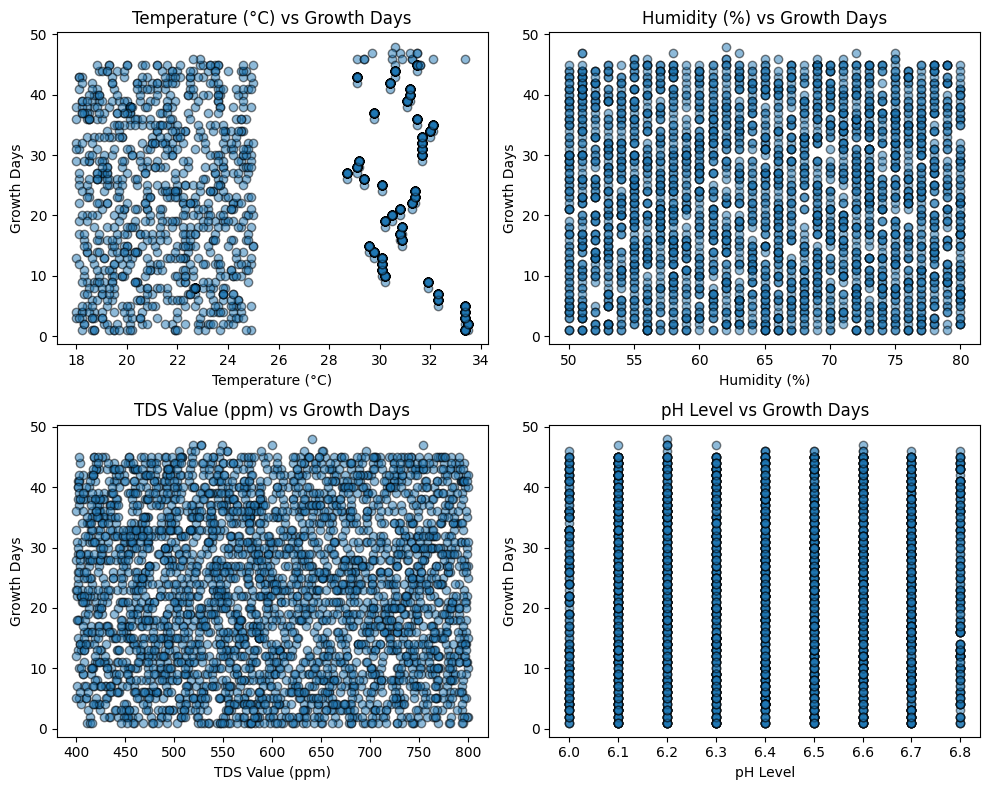

In [ ]:
# Create a scatter plot for the features against 'Growth Days'
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axs array to make it easier to access individual subplots
axs = axs.ravel()

for i, feature in enumerate(feature_to_plot):
    axs[i].scatter(lettuce_df[feature], lettuce_df['Growth Days'], alpha=0.5, edgecolor='k')
    axs[i].set_title(f'{feature} vs Growth Days')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Growth Days')

# Remove any empty subplots if the number of features is less than 4
if len(feature_to_plot) < 4:
    for i in range(len(feature_to_plot), 4):
        fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

### Observation
  
   We can see that the `Temperature` and `Humidity` have a weak correlations with `Growth Days`, while `TDS Value` shows a positive correlation. `pH Level` do not exhibit a clear relationship with `Growth Days`.